# 03. Feature Points Detection

-   **Nama:** Muhammad Neo Cicero Koda
-   **NIM:** 13522108
-   **Fitur Unik:** Tugas ini mencakup deteksi feature/corner menggunakan Harris, SIFT, dan FAST.

In [1]:
import cv2
import numpy as np
import pandas as pd
from skimage import data
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt
import os

os.makedirs('output', exist_ok=True)

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Load images
img_std_color_raw = data.checkerboard()
img_std_u8 = img_as_ubyte(img_std_color_raw)
img_std_color = cv2.cvtColor(img_std_u8, cv2.COLOR_GRAY2BGR)
print(f"Loaded checkerboard.png: {img_std_u8.shape}, {img_std_u8.dtype}")

img_extra_color_raw = data.astronaut()
img_extra_u8 = cv2.cvtColor(img_extra_color_raw, cv2.COLOR_RGB2GRAY)
img_extra_color = cv2.cvtColor(img_extra_color_raw, cv2.COLOR_RGB2BGR)
print(f"Loaded astronaut.png (grayscale): {img_extra_u8.shape}, {img_extra_u8.dtype}")

Loaded checkerboard.png: (200, 200), uint8
Loaded astronaut.png (grayscale): (512, 512), uint8


Harris corner detection complete.


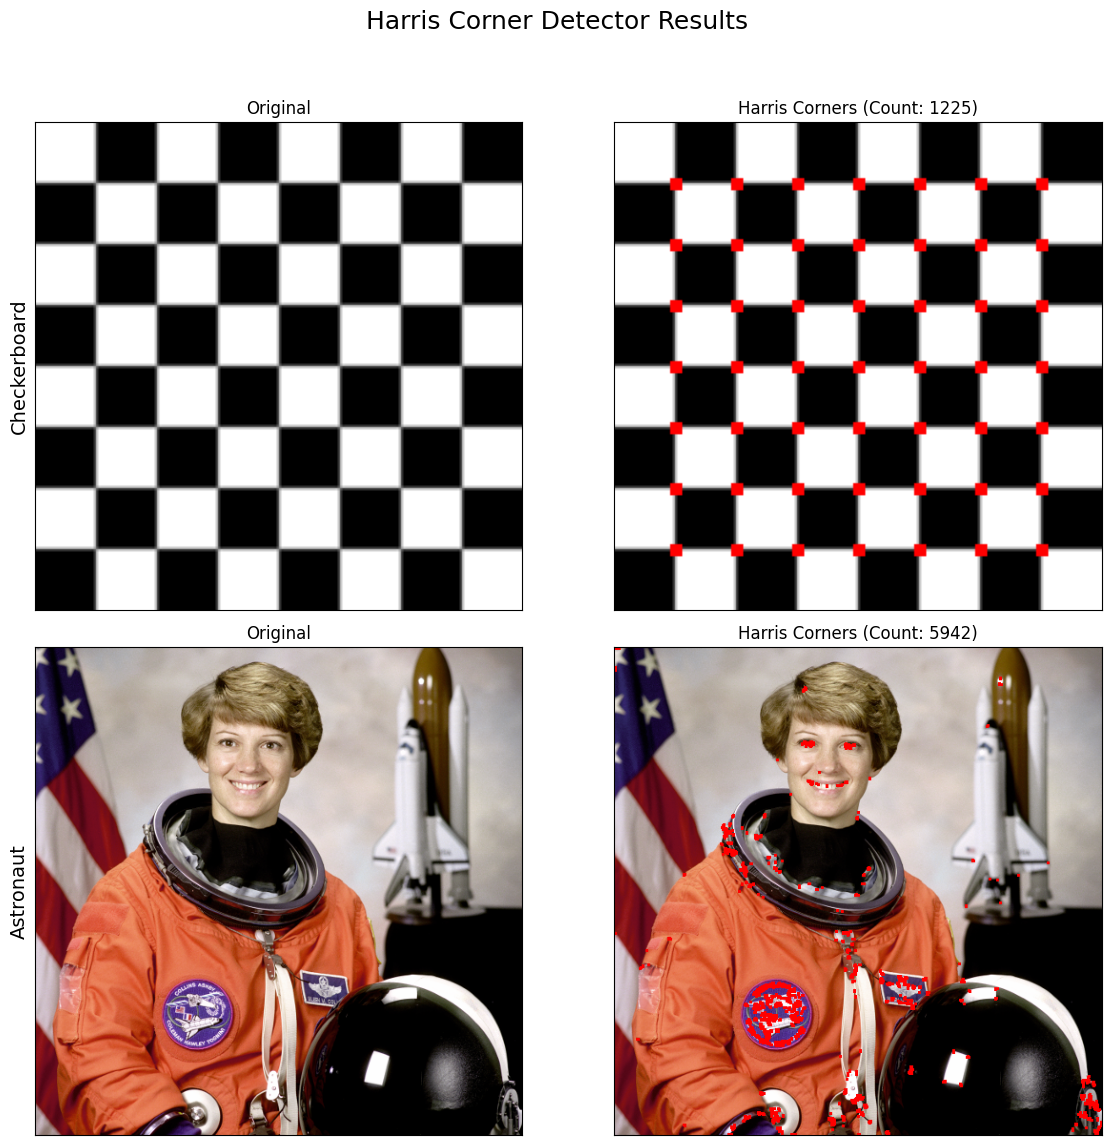

In [11]:
# Feature points using Harris
results_list = []

img_std_harris = img_std_color.copy()
gray_float_std = np.float32(img_std_u8)
dst_std = cv2.cornerHarris(gray_float_std, blockSize=2, ksize=3, k=0.04)
dst_std = cv2.dilate(dst_std, None)
threshold_std = 0.01 * dst_std.max()
img_std_harris[dst_std > threshold_std] = [0, 0, 255]
cv2.imwrite('output/checkerboard_harris.png', img_std_harris)

corners_std = np.argwhere(dst_std > threshold_std)
responses_std = dst_std[corners_std[:, 0], corners_std[:, 1]]
num_corners_std = len(corners_std)
mean_response_std = np.mean(responses_std)
var_response_std = np.var(responses_std)
spread_x_std = np.std(corners_std[:, 1])
spread_y_std = np.std(corners_std[:, 0])

results_list.append({
    'Image': 'checkerboard', 'Detector': 'Harris',
    'Num_Features': num_corners_std,
    'Mean_Response': mean_response_std,
    'Var_Response': var_response_std,
    'Spread_X': spread_x_std,
    'Spread_Y': spread_y_std,
    'Parameters': 'blockSize=2, ksize=3, k=0.04'
})

img_extra_harris = img_extra_color.copy()
gray_float_extra = np.float32(img_extra_u8)
dst_extra = cv2.cornerHarris(gray_float_extra, blockSize=2, ksize=3, k=0.04)
dst_extra = cv2.dilate(dst_extra, None)
threshold_extra = 0.01 * dst_extra.max()
img_extra_harris[dst_extra > threshold_extra] = [0, 0, 255]
cv2.imwrite('output/astronaut_harris.png', img_extra_harris)

corners_extra = np.argwhere(dst_extra > threshold_extra)
responses_extra = dst_extra[corners_extra[:, 0], corners_extra[:, 1]]
num_corners_extra = len(corners_extra)
mean_response_extra = np.mean(responses_extra)
var_response_extra = np.var(responses_extra)
spread_x_extra = np.std(corners_extra[:, 1])
spread_y_extra = np.std(corners_extra[:, 0])

results_list.append({
    'Image': 'astronaut', 'Detector': 'Harris',
    'Num_Features': num_corners_extra,
    'Mean_Response': mean_response_extra,
    'Var_Response': var_response_extra,
    'Spread_X': spread_x_extra,
    'Spread_Y': spread_y_extra,
    'Parameters': 'blockSize=2, ksize=3, k=0.04'
})

print("Harris corner detection complete.")

# Display Harris Plot
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Harris Corner Detector Results', fontsize=18)

ax[0, 0].imshow(img_std_color)
ax[0, 0].set_title('Original')
ax[0, 0].set_ylabel('Checkerboard', fontsize=14)
ax[0, 1].imshow(cv2.cvtColor(img_std_harris, cv2.COLOR_BGR2RGB))
ax[0, 1].set_title(f'Harris Corners (Count: {num_corners_std})')

ax[1, 0].imshow(cv2.cvtColor(img_extra_color, cv2.COLOR_BGR2RGB))
ax[1, 0].set_title('Original')
ax[1, 0].set_ylabel('Astronaut', fontsize=14)
ax[1, 1].imshow(cv2.cvtColor(img_extra_harris, cv2.COLOR_BGR2RGB))
ax[1, 1].set_title(f'Harris Corners (Count: {num_corners_extra})')

for a in ax.flat:
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

SIFT feature detection complete.


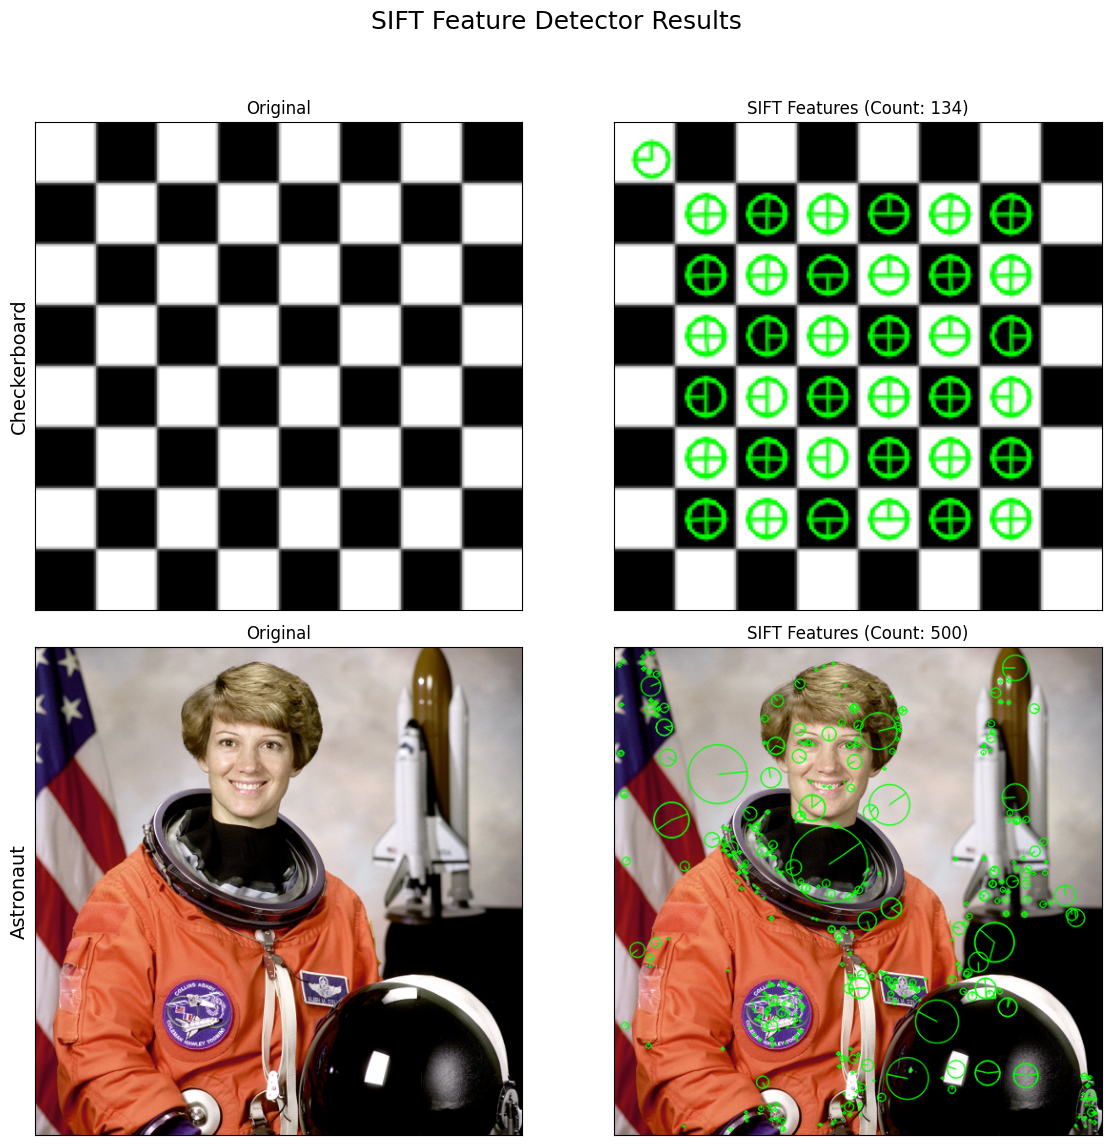

In [12]:
# Feature points using SIFT
sift = cv2.SIFT_create(nfeatures=500)

kp_std, des_std = sift.detectAndCompute(img_std_u8, None)
img_std_sift = cv2.drawKeypoints(img_std_color, kp_std, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
num_features_sift_std = len(kp_std)
cv2.imwrite('output/checkerboard_sift.png', img_std_sift)

responses_std = np.array([kp.response for kp in kp_std])
coords_std = np.array([kp.pt for kp in kp_std])
mean_response_std = np.mean(responses_std)
var_response_std = np.var(responses_std)
spread_x_std = np.std(coords_std[:, 0])
spread_y_std = np.std(coords_std[:, 1])

results_list.append({
    'Image': 'checkerboard', 'Detector': 'SIFT',
    'Num_Features': num_features_sift_std,
    'Mean_Response': mean_response_std,
    'Var_Response': var_response_std,
    'Spread_X': spread_x_std,
    'Spread_Y': spread_y_std,
    'Parameters': 'nfeatures=500'
})

kp_extra, des_extra = sift.detectAndCompute(img_extra_u8, None)
img_extra_sift = cv2.drawKeypoints(img_extra_color, kp_extra, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
num_features_sift_extra = len(kp_extra)
cv2.imwrite('output/astronaut_sift.png', img_extra_sift)

responses_extra = np.array([kp.response for kp in kp_extra])
coords_extra = np.array([kp.pt for kp in kp_extra])
mean_response_extra = np.mean(responses_extra)
var_response_extra = np.var(responses_extra)
spread_x_extra = np.std(coords_extra[:, 0])
spread_y_extra = np.std(coords_extra[:, 1])

results_list.append({
    'Image': 'astronaut', 'Detector': 'SIFT',
    'Num_Features': num_features_sift_extra,
    'Mean_Response': mean_response_extra,
    'Var_Response': var_response_extra,
    'Spread_X': spread_x_extra,
    'Spread_Y': spread_y_extra,
    'Parameters': 'nfeatures=500'
})

print("SIFT feature detection complete.")

#Display SIFT Plot
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('SIFT Feature Detector Results', fontsize=18)

ax[0, 0].imshow(img_std_color)
ax[0, 0].set_title('Original')
ax[0, 0].set_ylabel('Checkerboard', fontsize=14)
ax[0, 1].imshow(cv2.cvtColor(img_std_sift, cv2.COLOR_BGR2RGB))
ax[0, 1].set_title(f'SIFT Features (Count: {num_features_sift_std})')

ax[1, 0].imshow(cv2.cvtColor(img_extra_color, cv2.COLOR_BGR2RGB))
ax[1, 0].set_title('Original')
ax[1, 0].set_ylabel('Astronaut', fontsize=14)
ax[1, 1].imshow(cv2.cvtColor(img_extra_sift, cv2.COLOR_BGR2RGB))
ax[1, 1].set_title(f'SIFT Features (Count: {num_features_sift_extra})')

for a in ax.flat:
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

FAST feature detection complete.


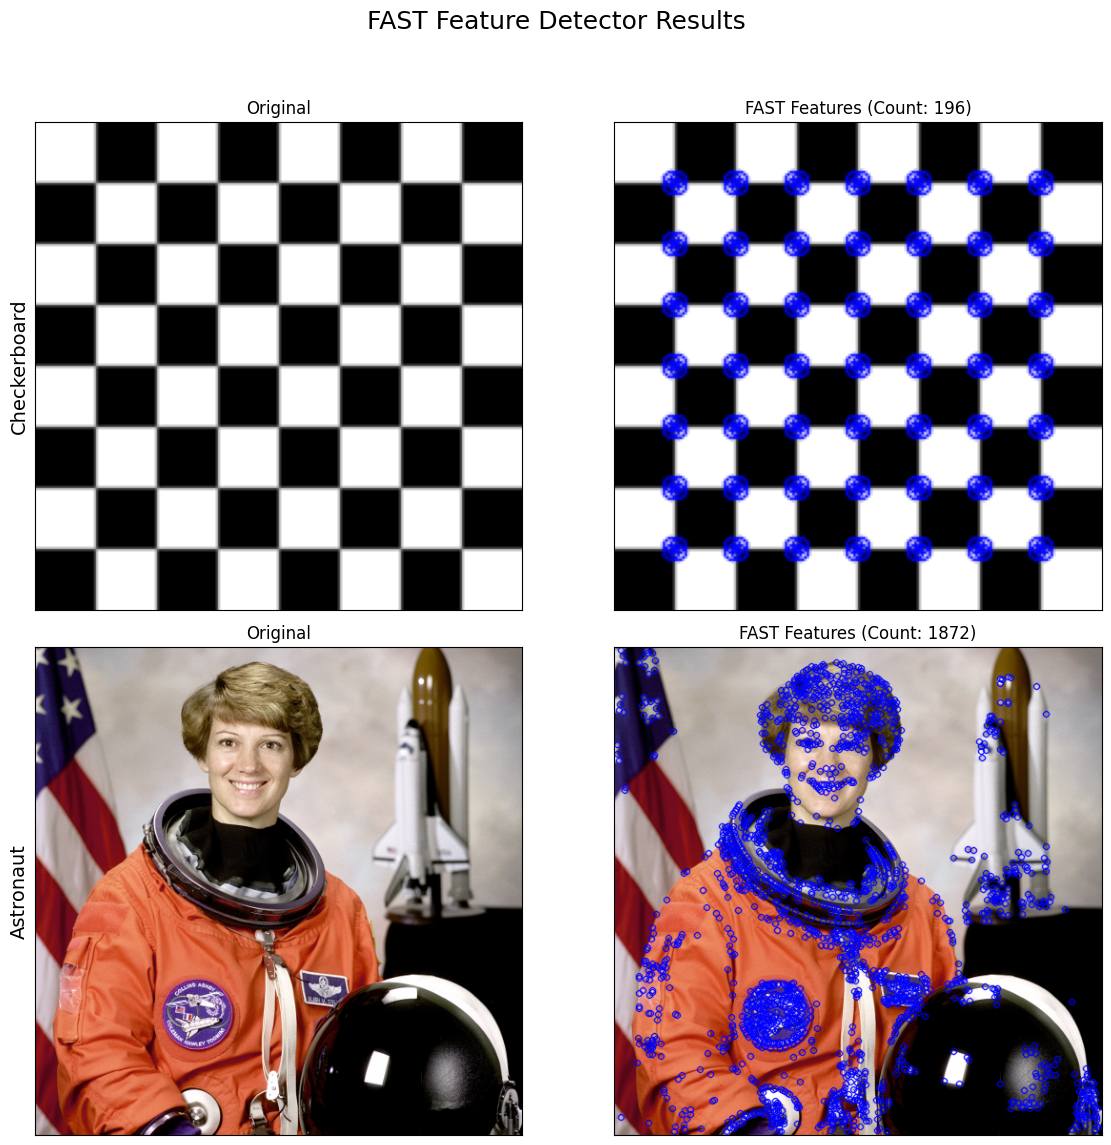

In [13]:
# Feature points using FAST
fast = cv2.FastFeatureDetector_create(threshold=20, nonmaxSuppression=True)

kp_std_fast = fast.detect(img_std_u8, None)
img_std_fast = cv2.drawKeypoints(img_std_color, kp_std_fast, None, color=(255, 0, 0))
num_features_fast_std = len(kp_std_fast)
cv2.imwrite('output/checkerboard_fast.png', img_std_fast)

responses_std_fast = np.array([kp.response for kp in kp_std_fast])
coords_std_fast = np.array([kp.pt for kp in kp_std_fast])
mean_response_std_fast = np.mean(responses_std_fast)
var_response_std_fast = np.var(responses_std_fast)
spread_x_std_fast = np.std(coords_std_fast[:, 0])
spread_y_std_fast = np.std(coords_std_fast[:, 1])

results_list.append({
    'Image': 'checkerboard', 'Detector': 'FAST',
    'Num_Features': num_features_fast_std,
    'Mean_Response': mean_response_std_fast,
    'Var_Response': var_response_std_fast,
    'Spread_X': spread_x_std_fast,
    'Spread_Y': spread_y_std_fast,
    'Parameters': 'threshold=20, nonmaxSuppression=True'
})

kp_extra_fast = fast.detect(img_extra_u8, None)
img_extra_fast = cv2.drawKeypoints(img_extra_color, kp_extra_fast, None, color=(255, 0, 0))
num_features_fast_extra = len(kp_extra_fast)
cv2.imwrite('output/astronaut_fast.png', img_extra_fast)

responses_extra_fast = np.array([kp.response for kp in kp_extra_fast])
coords_extra_fast = np.array([kp.pt for kp in kp_extra_fast])
mean_response_extra_fast = np.mean(responses_extra_fast)
var_response_extra_fast = np.var(responses_extra_fast)
spread_x_extra_fast = np.std(coords_extra_fast[:, 0])
spread_y_extra_fast = np.std(coords_extra_fast[:, 1])

results_list.append({
    'Image': 'astronaut', 'Detector': 'FAST',
    'Num_Features': num_features_fast_extra,
    'Mean_Response': mean_response_extra_fast,
    'Var_Response': var_response_extra_fast,
    'Spread_X': spread_x_extra_fast,
    'Spread_Y': spread_y_extra_fast,
    'Parameters': 'threshold=20, nonmaxSuppression=True'
})

print("FAST feature detection complete.")

# Display FAST Plot
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('FAST Feature Detector Results', fontsize=18)

ax[0, 0].imshow(img_std_color)
ax[0, 0].set_title('Original')
ax[0, 0].set_ylabel('Checkerboard', fontsize=14)
ax[0, 1].imshow(cv2.cvtColor(img_std_fast, cv2.COLOR_BGR2RGB))
ax[0, 1].set_title(f'FAST Features (Count: {num_features_fast_std})')

ax[1, 0].imshow(cv2.cvtColor(img_extra_color, cv2.COLOR_BGR2RGB))
ax[1, 0].set_title('Original')
ax[1, 0].set_ylabel('Astronaut', fontsize=14)
ax[1, 1].imshow(cv2.cvtColor(img_extra_fast, cv2.COLOR_BGR2RGB))
ax[1, 1].set_title(f'FAST Features (Count: {num_features_fast_extra})')

for a in ax.flat:
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [15]:
# Save statistics to CSV
df_stats = pd.DataFrame(results_list)
df_stats.to_csv('output/feature_statistics.csv', index=False)

print("File statistik berhasil disimpan ke 'output/feature_statistics.csv'")
display(df_stats)

File statistik berhasil disimpan ke 'output/feature_statistics.csv'


,Image,Detector,Num_Features,Mean_Response,Var_Response,Spread_X,Spread_Y,Parameters
0,checkerboard,Harris,1225,8.711037e+07,0.000000e+00,50.019996,50.019996,"blockSize=2, ksize=3, k=0.04"
1,astronaut,Harris,5942,9.795292e+06,1.942414e+14,109.960167,112.908686,"blockSize=2, ksize=3, k=0.04"
2,checkerboard,SIFT,134,1.284626e-01,3.248160e-05,44.027450,44.027454,nfeatures=500
3,astronaut,SIFT,500,5.238763e-02,2.491356e-04,124.517654,138.346042,nfeatures=500
4,checkerboard,FAST,196,7.900000e+01,0.000000e+00,50.022495,50.022495,"threshold=20, nonmaxSuppression=True"
5,astronaut,FAST,1872,4.369284e+01,7.244008e+02,104.415647,145.978722,"threshold=20, nonmaxSuppression=True"
